# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [41]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
from dotenv import load_dotenv
load_dotenv()

True

In [42]:
# Read your api key environment variable
api_key = os.getenv('news_key')

In [43]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [44]:
# Fetch the Bitcoin news articles
from_dt = '2020-11-20'
to_dt = '2020-12-18'
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    from_param=from_dt,
    to=to_dt,
    language="en")

In [45]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    from_param=from_dt,
    to=to_dt,
    language="en")

In [46]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/farahawad/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
eth_df = pd.DataFrame(ethereum_news_en['articles'])
btc_df = pd.DataFrame(bitcoin_news_en['articles'])

In [48]:
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [49]:
#create sentiment list and iterrate through rows for BTC
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
    "article": []
}

for index, row in btc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["content"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        text_sent['article'].append(row['content'])
    except AttributeError:
        pass

In [50]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = pd.DataFrame(text_sent)

In [51]:
#create sentiment list and iterrate through rows for ETH
text_sent_eth = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
    "article": []
}

for index, row in eth_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["content"])
        text_sent_eth["text_compound"].append(text_sentiment["compound"])
        text_sent_eth["text_pos"].append(text_sentiment["pos"])
        text_sent_eth["text_neu"].append(text_sentiment["neu"])
        text_sent_eth["text_neg"].append(text_sentiment["neg"])
        text_sent_eth["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        text_sent_eth['article'].append(row['content'])
    except AttributeError:
        pass

In [52]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = pd.DataFrame(text_sent_eth)

In [53]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.255311,0.079842,0.902526,0.017579,0.526316
std,0.352664,0.075083,0.084095,0.035419,0.611775
min,-0.585900,0.000000,0.773000,0.000000,-1.000000
25%,0.000000,0.000000,0.833500,0.000000,0.000000
50%,0.202300,0.072000,0.897000,0.000000,1.000000
75%,0.538650,0.150000,1.000000,0.000000,1.000000
max,0.801600,0.209000,1.000000,0.103000,1.000000


In [54]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.050589,0.023211,0.968421,0.008368,0.157895
std,0.174537,0.037527,0.047865,0.025133,0.602140
min,-0.340000,0.000000,0.845000,0.000000,-1.000000
25%,0.000000,0.000000,0.943000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.088950,0.052000,1.000000,0.000000,0.500000
max,0.421500,0.117000,1.000000,0.085000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [56]:
lemmatizer = WordNetLemmatizer()

In [57]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    # Expand the default stopwords list if necessary
    sw_addons = {'bitcoin','ethereum', 'cryptocurrency', 'file', 'photo', 'said','reuters', 'ruvicillustrationlondon', 'illustration', 'reutersdado', 'currency'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [58]:
# Create a new tokens column for bitcoin
btc_sentiment_df['token'] = btc_sentiment_df['article'].apply(tokenizer)

In [59]:
# Create a new tokens column for ethereum
eth_sentiment_df['token'] = eth_sentiment_df['article'].apply(tokenizer)

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [60]:
from collections import Counter
from nltk import ngrams

In [61]:
# Generate the Bitcoin N-grams where N=2
big_string_btc = btc_sentiment_df.article.str.cat()
ngrams_btc = (ngrams(tokenizer(big_string_btc), 2))

In [62]:
# Generate the Ethereum N-grams where N=2
big_string_eth = eth_sentiment_df.article.str.cat()
ngrams_eth = (ngrams(tokenizer(big_string_eth), 2))

In [63]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [64]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(big_string_btc))

[('ha', 7),
 ('november', 6),
 ('year', 5),
 ('alltime', 4),
 ('price', 4),
 ('market', 4),
 ('virtual', 4),
 ('seen', 4),
 ('high', 3),
 ('value', 3)]

In [65]:
# Get the top 10 words for Ethereum
token_count(tokenizer(big_string_eth))

[('virtual', 12),
 ('taken', 12),
 ('seen', 10),
 ('representation', 9),
 ('november', 6),
 ('charsby', 6),
 ('us', 5),
 ('york', 5),
 ('picture', 4),
 ('charsfile', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

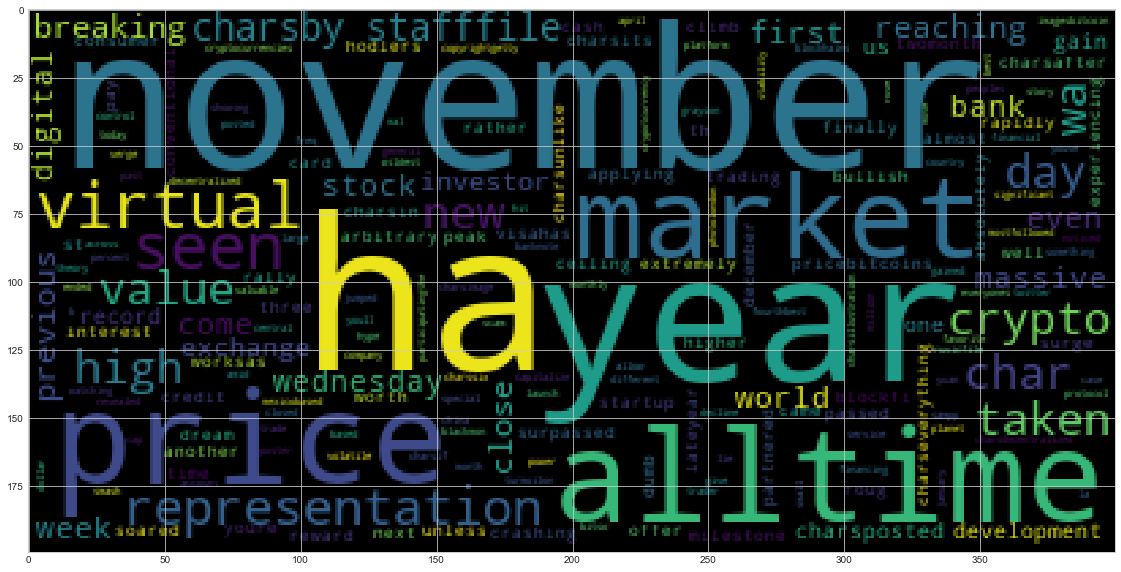

In [67]:
# Generate the Bitcoin word cloud
input_btc = ' '.join(tokenizer(big_string_btc))
wc_btc = WordCloud().generate(input_btc)
plt.imshow(wc_btc)

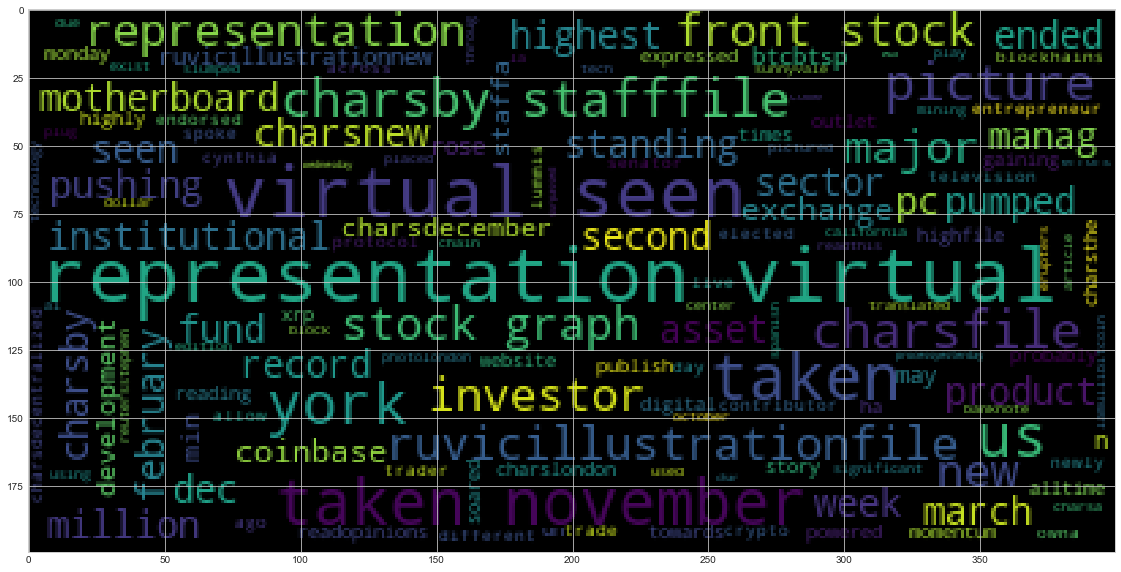

In [68]:
# Generate the Ethereum word cloud
input_eth = ' '.join(tokenizer(big_string_eth))
wc_eth = WordCloud().generate(input_eth)
plt.imshow(wc_eth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [69]:
import spacy
from spacy import displacy

In [70]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [71]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [72]:
# Concatenate all of the bitcoin text together
big_string_btc

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars]Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars]Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 da

In [73]:
# Run the NER processor on all of the text
doc_btc = nlp(big_string_btc)
# Add a title to the document
doc_btc.user_data['title'] = 'Bitcoin NER'

In [74]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [75]:
# List all Entities
entities_btc = [ent.text for ent in doc_btc.ents]

---

## Ethereum NER

In [76]:
# Concatenate all of the bitcoin text together
big_string_eth

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars]FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado 

In [77]:
# Run the NER processor on all of the text
doc_eth = nlp(big_string_eth)

# Add a title to the document
doc_eth.user_data['title'] = 'Ethereum NER'

In [78]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [79]:
# List all Entities
entities_eth = [ent.text for ent in doc_eth.ents]

In [80]:
entities_eth

['February 3, 2018',
 'REUTERS/',
 'Reuters',
 'February 3, 2018',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'XRP',
 'Monday',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'U.S.',
 'Bitcoin',
 'March 13, 2020',
 'REUTERS/',
 'Reuters',
 'U.S.',
 'Bitcoin',
 'March 13, 2020',
 'REUTERS/',
 'Reuters',
 'U.S.',
 'YORK',
 'Reuters',
 '$429 million',
 'the week ended Dec. 7',
 'second',
 'YORK',
 'Reuters',
 '$429 million',
 'the week ended Dec. 7',
 'second',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'chars]The New York Times',
 'Coinbase',
 '15, 2020',
 '6 min',
 'A few days ago',
 'US',
 'Cynthia Lummis',
 'Bitcoin',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'U.S.',
 'May 26, 2020',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'November 19, 2020',
 'REUTERS/',
 'LONDON',
 '